# Linear regression using the Normal Equation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X=2*np.random.rand(100,1)

y=4+3 * X+np.random.rand(100,1)

Text(0,0.5,'$y$')

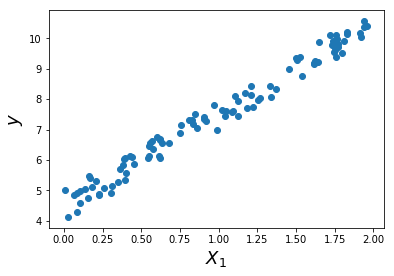

In [3]:
plt.scatter(X,y,)
plt.xlabel('$X_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18)

In [4]:
X_b=np.c_[np.ones((100,1)),X]

In [5]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.55642417],
       [2.97006962]])

In [6]:
### so now we have found our best fit 
###now lets imagine we have new data 


X_new=np.array([[0],[2]])

X_new_b=np.c_[np.ones((2,1)),X_new]

y_predict=X_new_b.dot(theta_best)

y_predict

array([[ 4.55642417],
       [10.4965634 ]])

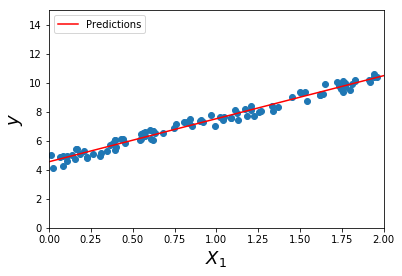

In [7]:
plt.plot(X_new,y_predict,'r',label="Predictions")
plt.scatter(X,y,)
plt.axis([0, 2, 0, 15])
plt.xlabel('$X_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
plt.legend(loc='upper left')
plt.show()


In [8]:
####so the above is what actually happens when we do the sklearn linear Reg 
##so lets do that one 

from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

Lr.fit(X,y)

LinearRegression()

In [9]:
Lr.intercept_

array([4.55642417])

In [10]:
Lr.coef_

array([[2.97006962]])

In [11]:
Lr.predict(X_new)

array([[ 4.55642417],
       [10.4965634 ]])

In [12]:
Lr.score(X,y)

0.9763982467094758

In [13]:
np.linalg.lstsq(X_b, y, rcond=1e-6)

(array([[4.55642417],
        [2.97006962]]),
 array([7.56642755]),
 2,
 array([14.53932939,  4.09709276]))

In [14]:
np.linalg.lstsq?

# Batch Gradient


In [15]:
##So for batch Gradient we said it gives us same results as the equattion formula
##Also the batch gradient is dependent on the cost function and the learning rate
##note that when learning rate is low, it will take time to get to global minimum,
##this is because,it has to find the gradient for every point in the training set
##and this takes some time.
##just like the equation method
##hence when using large data sets do not use it
##when learning is high it will even go to the extent of bouncing around
##till we get to the minimum which can take forever

In [16]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)
theta

array([[-2.43280327],
       [-0.14696089]])

In [17]:
for i in range(n_iterations):
    gradient=2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [18]:
theta

array([[4.55642417],
       [2.97006962]])

In [19]:

X_new_b.dot(theta)

array([[ 4.55642417],
       [10.4965634 ]])

In [20]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [21]:
##so from here,
##we have different learning rates and their outcomes
##from the left we see that the learning rate is 0.2 and the red dashed lines, are the starting point
##we realize that it will take some time before it gets to the minimum

##in the center we realised the learning rate was reduced hence got to the global minimum faster
##for the right it had a high learning rate hence it wwas biuncing around

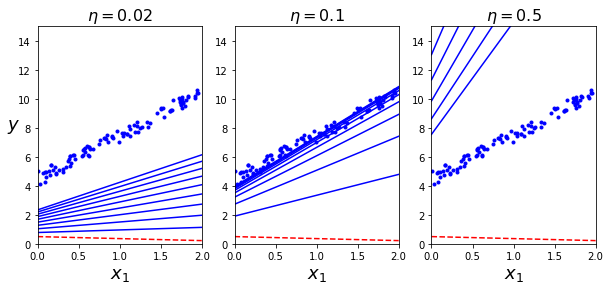

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient

In [23]:
##So now we do not want to go step by step
##why not do it randomly 
##so we use the stochastic Gradient
##for this we are not to find the global minimum  step by step
##it also helps in dealing with larger data sets.
##the only disadvantage is that the results is good not optmal
##example

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [24]:
theta

array([[4.56888236],
       [2.94927567]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,eta0=0.1,tol=1e-3,penalty=None)

In [26]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [27]:
sgd_reg.intercept_

array([4.55643782])

In [28]:
sgd_reg.coef_

array([2.9793287])

# Polynomial Regression


In [29]:
##so lets day we explore our data 
##and we realized by plotting that this data is not linear
##Boom so are stuck???
####eeei what do we do
##don'tworry 
###simple way to do this is to
#add powers of each feature as new features, then train a linear model on this extended
#set of features. This technique is called Polynomial Regression.

m=100
X=6 * np.random.rand(m, 1) - 3
y=0.5 * X**2 + X + 2 + np.random.randn(m, 1)

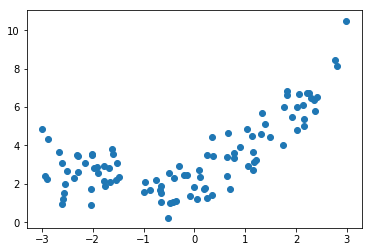

In [30]:
plt.scatter(X,y)

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_f=PolynomialFeatures(degree=2,include_bias=False)

X_poly=poly_f.fit_transform(X)


In [33]:
X_poly[0]

array([2.15290063, 4.63498111])

In [34]:
X[0]

array([2.15290063])

In [35]:
###Now we have the features having polinomials 
##so now we can use the linearReg or any other Reg here 

Lr=LinearRegression()

In [36]:
Lr.fit(X_poly,y)


LinearRegression()

In [37]:
Lr.intercept_

array([2.28405711])

In [38]:
Lr.coef_

array([[0.88171323, 0.44446033]])

In [39]:
X_new=np.linspace(-3, 3, 100).reshape(-1,1)

X_new_poly=poly_f.transform(X_new)


In [40]:
X_new.shape

(100, 1)

In [44]:
y_new.shape

(100, 1)

In [42]:
y_new=Lr.predict(X_new_poly)

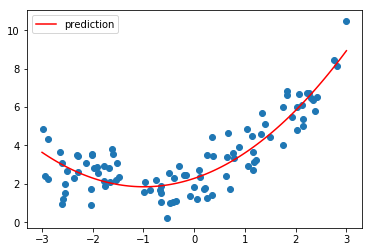

In [45]:
plt.scatter(X, y)
plt.plot( X_new,y_new,'r',label='prediction')
plt.legend()

[-3, 3, 0, 10]

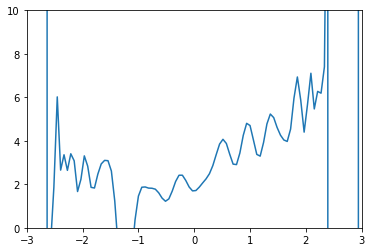

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

DG=300
polybig_Features=PolynomialFeatures(degree=DG,include_bias=False)
std_scalar= StandardScaler()
Lr=LinearRegression()

BIGPOLTPIPE=Pipeline([
    ('polybig',polybig_Features),
    ('scalar',std_scalar),
    ('regressor',Lr)
    
])


BIGPOLTPIPE.fit(X,y)
y_new_big=BIGPOLTPIPE.predict(X_new)
plt.plot(X_new,y_new_big)

plt.axis([-3, 3, 0, 10])

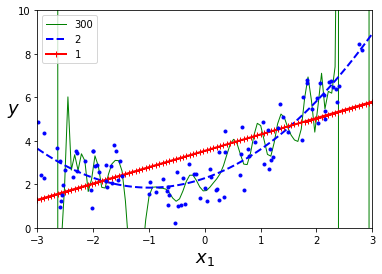

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

# Learning Curve

In [48]:
##so this is a plot to help us know if our model is good for generalization or not
##just like how we used cross_val,we said if the model is good for our training data but not good in cross_val then
##we said its overfitting
##if it's bad on both side then we say its underfitting
##now this allows us to use a map of  sort
###so lets go into it and see
##for our regression we know our cost is score,mean square error,rmse
##so we go take one 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split



In [49]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [50]:
X_train.shape

(80, 1)

In [51]:
len(X_train)

80

In [52]:
X_train[:4]

array([[-0.36473639],
       [-1.59477977],
       [ 0.34127066],
       [-2.03780756]])

In [53]:
for i in range(1,2):
    print (X_train[:2] )
    Lr.fit(X_train[:2],y_train[:2])
    y_train_predict=Lr.predict(X_train[:2])
    y_val_predict=Lr.predict(X_val[:2])

[[-0.36473639]
 [-1.59477977]]


In [54]:
train_error=[]
val_error=[]
def plot_Learning_Curve(model,X,y):
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_trained_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        
        train_error.append(mean_squared_error(y_train[:m],y_trained_predict))
        val_error.append(mean_squared_error(y_val,y_val_predict))
        rmse_train_error=np.sqrt(train_error)
        rmse_val_error=np.sqrt(val_error)
        
        
    plt.plot(rmse_train_error,'r',label='train')
    plt.plot(rmse_val_error,'b',label='validation')
    plt.xlabel('Training Set Size')
    plt.ylabel('Root Mean Score')
    plt.legend(loc='best')
    plt.axis([0,80,0,5])
    plt.show()
        
        
        

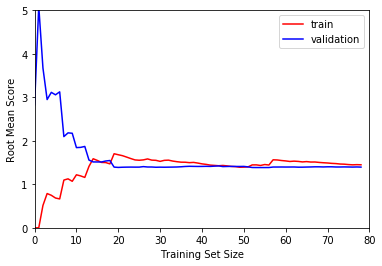

In [55]:
Lin_reg=LinearRegression()

plot_Learning_Curve(Lin_reg,X,y)

In [56]:
##here we see that for the training model it starts at 0 which is cool
##but since our data is not linear we see that we get plenty noise
##if we add more data still this won't work 
##why because our data is polynomial
##now lets look at the validation set, here we see that the model is not able to train our data at all
##see the root mean square kai
##so we go see that it plataeus and meets the training set
##so the gap is high but they meet at same place
#lets try usign polynomila


In [57]:
Poly_10=PolynomialFeatures(degree=2,include_bias=False)

#plot_Learning_Curve(Poly_10,X,y)
##poly has no prdict value 
##so we go change am go poly then convert to linear 
##remeber to scale am


In [58]:
Poly10_pipe=Pipeline([('Poly10',Poly_10),
                      ('scala',StandardScaler()),
                      ('REGRESSOR',LinearRegression())
    
])

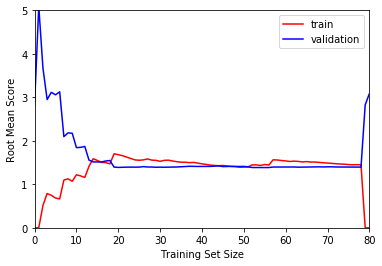

In [59]:
plot_Learning_Curve(Poly10_pipe,X,y)

In [278]:
Poly10_pipe.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('Poly10', PolynomialFeatures(include_bias=False)),
                ('scala', StandardScaler()),
                ('REGRESSOR', LinearRegression())])>

# Regularization

### Ridge Regressor

In [60]:

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [61]:
X

array([[1.12362036],
       [2.85214292],
       [2.19598183],
       [1.79597545],
       [0.46805592],
       [0.46798356],
       [0.17425084],
       [2.59852844],
       [1.80334504],
       [2.12421773],
       [0.06175348],
       [2.90972956],
       [2.49732792],
       [0.63701733],
       [0.5454749 ],
       [0.55021353],
       [0.91272673],
       [1.57426929],
       [1.29583506],
       [0.87368742]])

In [62]:
from sklearn.linear_model import Ridge

In [63]:
Rdg=Ridge(alpha=1,solver='cholesky')
Rdg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [64]:
Rdg.intercept_

array([1.00650911])

In [65]:
Rdg.coef_

array([[0.36280369]])

In [66]:
Rdg.predict([[1.5]])

array([[1.55071465]])

In [67]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor(penalty='l2')

In [68]:
sgd.fit(X,y.ravel())

SGDRegressor()

In [69]:
sgd.predict([[1.5]])

array([1.46543286])

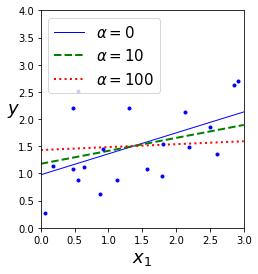

In [70]:
from sklearn.linear_model import Ridge

def plot_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [71]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [72]:
from sklearn.linear_model import Ridge
Rdg=Ridge(alpha=100)
Rdg.fit(X,y)
y_pred_new=Rdg.predict(X_new)



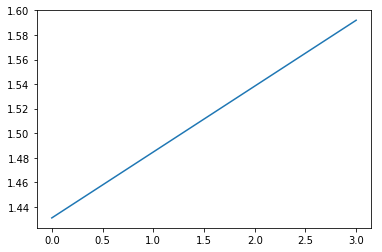

In [73]:
plt.plot(X_new,y_pred_new)

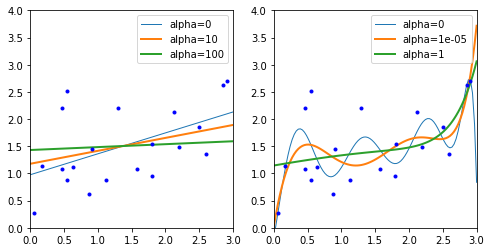

In [74]:
def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha in alphas:
        model=model_class(alpha,**model_kargs) if alpha > 0 else LinearRegression()
        ##if alpha >0:
        #model.predict(X_new)
        #else:
        #LinearRegression()
        if polynomial:
            model=Pipeline([
                ('poly',PolynomialFeatures(degree=10, include_bias=False)),
                ('scale',StandardScaler()),
                ('regressor',model)
                           ])
        model.fit(X,y)
        y_new_val=model.predict(X_new) 
    
        lw=2 if alpha > 0 else 1
        ##linewidth
        ##if alpha >0:
        ##lw=2
        ##else:
        ##lw=1
    
        plt.plot(X_new,y_new_val,linewidth=lw,label='alpha={}'.format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend()
    plt.axis([0, 3, 0, 4])
    

     
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
    


## Lasso Regressor


In [75]:
from sklearn.linear_model import Lasso

Ls=Lasso(alpha=0.1)

In [76]:
Ls.fit(X,y)
Ls.predict(X_new)

array([1.14537356, 1.15330302, 1.16123248, 1.16916193, 1.17709139,
       1.18502085, 1.19295031, 1.20087977, 1.20880923, 1.21673868,
       1.22466814, 1.2325976 , 1.24052706, 1.24845652, 1.25638598,
       1.26431543, 1.27224489, 1.28017435, 1.28810381, 1.29603327,
       1.30396272, 1.31189218, 1.31982164, 1.3277511 , 1.33568056,
       1.34361002, 1.35153947, 1.35946893, 1.36739839, 1.37532785,
       1.38325731, 1.39118677, 1.39911622, 1.40704568, 1.41497514,
       1.4229046 , 1.43083406, 1.43876352, 1.44669297, 1.45462243,
       1.46255189, 1.47048135, 1.47841081, 1.48634027, 1.49426972,
       1.50219918, 1.51012864, 1.5180581 , 1.52598756, 1.53391702,
       1.54184647, 1.54977593, 1.55770539, 1.56563485, 1.57356431,
       1.58149376, 1.58942322, 1.59735268, 1.60528214, 1.6132116 ,
       1.62114106, 1.62907051, 1.63699997, 1.64492943, 1.65285889,
       1.66078835, 1.66871781, 1.67664726, 1.68457672, 1.69250618,
       1.70043564, 1.7083651 , 1.71629456, 1.72422401, 1.73215

In [345]:
Ls.predict([[1.5]])

array([1.53788174])

In [77]:
from sklearn.linear_model import SGDRegressor

SGD=SGDRegressor(penalty='l1')

SGD.fit(X,y.ravel())

SGDRegressor(penalty='l1')

In [78]:
SGD.predict([[1.5]])

array([1.46726685])

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.763952653967139, tolerance: 0.0009294783355207351
  positive)


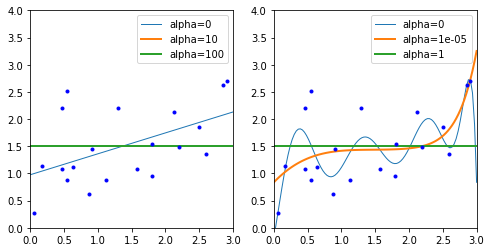

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-5,1),random_state=42)

### Elastic Net

In [80]:
##this one is between Ridge and Lasso 
##so this regularization is a simple mix of Ridge and Lasso
##when the r=0 its a Ridge
##when r=1 its Lasso

##KeyNote: When do we use plain Linear Regression,Lasso,Ridge?

##Mostly we need to have our model regularized
##so rarely use Linear Regression.Possibly use Ridge as it tends to regularize our solution
##if you realize you have so many useless features and want to send their weights to 0 use Lasso or Elastic Net
##but preferably use elastic because unlike lasso which acts up when the number of features are more than the trainig set,
##or when the features are strongly correlated elastic wont

In [91]:
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
Enet=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [92]:
Enet.fit(X,y)

ElasticNet(alpha=0.1)

In [93]:
Enet.predict([[1.5]])

array([1.54333232])

In [94]:
poly_scala=Pipeline([('poly_feat',PolynomialFeatures(degree=90,include_bias=False)),
                    ('scala',StandardScaler())])

X_poly_scaled=poly_scala.fit_transform(X_train)
X_val_poly_scaled=poly_scala.transform(X_val)

In [95]:
sdgreg=SGDRegressor(max_iter=1,tol=np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.005)

In [96]:
sdgreg

SGDRegressor(eta0=0.005, learning_rate='constant', max_iter=1, penalty=None,
             tol=inf, warm_start=True)

In [99]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sdgreg.fit(X_poly_scaled,y_train)
    y_val_predict=sdgreg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sdgreg)

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [100]:
best_epoch

0

In [101]:
best_model

SGDRegressor(eta0=0.005, learning_rate='constant', max_iter=1, penalty=None,
             tol=inf, warm_start=True)

# Logistic Regression

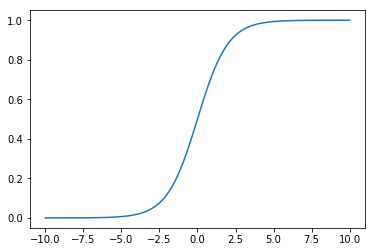

In [106]:
##this is a binary classification
###but with this we are using a linear Regression and tweaking it to produce an output of 0 and 1
##so its a probalistic model

t=np.linspace(-10,10,100)
sig=1/(1+np.exp(-t))

plt.plot(t,sig)

In [2]:
from sklearn import  datasets
iris=datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int) ###changes the booleen to 1 and 0 
###if true sends it to 1 if false 0

In [6]:
from sklearn.linear_model import LogisticRegression

Log_R=LogisticRegression(solver='lbfgs',random_state=42)

In [7]:
Log_R.fit(X,y)

LogisticRegression(random_state=42)

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [9]:
y_proba=Log_R.predict_proba(X_new)

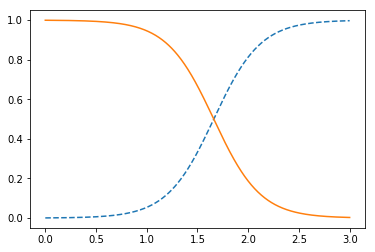

In [10]:
plt.plot(X_new,y_proba[:,1],'--',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'-',label='Not Iris-Virginica')

In [11]:
X_new[y_proba[:,1] >= 0.5][0]

array([1.66066066])

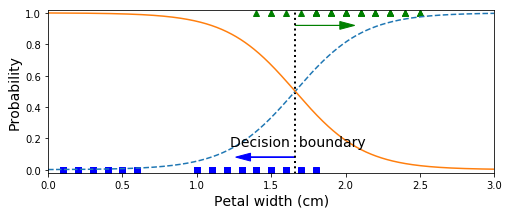

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba=Log_R.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new,y_proba[:,1],'--',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'-',label='Not Iris-Virginica')
plt.axis([0, 3, -0.02, 1.02])
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

In [13]:
###so now let our X data be petal_length and petal width
X=iris['data'][:,2:4]
y=(iris['target']==2).astype(np.int)

xo,x1=np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),np.linspace(0.8, 2.7, 200).reshape(-1, 1))

In [14]:
Log_R=LogisticRegression(C=10**10,solver='lbfgs',random_state=42)

In [15]:
Log_R.fit(X,y)

LogisticRegression(C=10000000000, random_state=42)

In [16]:
X_new=np.c_[xo.ravel(),x1.ravel()]

In [17]:
y_proba=Log_R.predict_proba(X_new)

In [18]:
x1.shape

(200, 500)

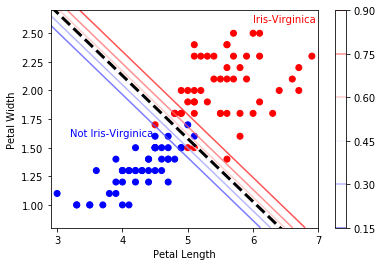

In [19]:

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.bwr)###this one takes the petal lenght and petal wwidth  on the X and brings them
###color is thr y which is either true or false
plt.contour(xo,x1,y_proba[:,1].reshape(xo.shape),cmap=plt.cm.bwr,vmin=0,vmax=0.95,alpha=0.75)###ploting decion boundary
plt.colorbar()
plt.axis([2.9, 7, 0.8, 2.7])
plt.text(3.2,1.6,"Not Iris-Virginica",color='b' )
plt.text(6,2.6,"Iris-Virginica",color='r' )
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')


#left_right = np.array([2.9, 7])
#boundary = -(Log_R.coef_[0][0] * left_right + Log_R.intercept_[0]) / Log_R.coef_[0][1]

plt.plot([2.9,7], [2.7361817,0.47773807], "k--", linewidth=3)

In [24]:
###Softmax Regression this is logistic regression used to resolve multiple class
##note its not multiple output 
##Multiple class

##so lets check on sklearn


X=iris['data'][:,(2,3)] ##petal length ,petal width
y=iris['target']

In [26]:
from sklearn.linear_model import  LogisticRegression

softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)

softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [28]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

###it puts them in a n array format

In [34]:
X_new=np.c_[x0.ravel(),x1.ravel()]

In [36]:
y_proba=softmax_reg.predict_proba(X_new)
y_pred=softmax_reg.predict(X_new)

Text(6,3,'Virginica')

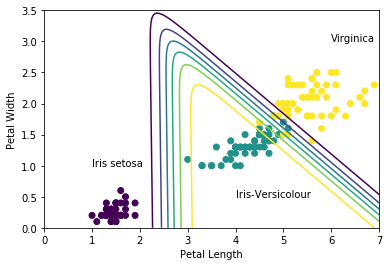

In [52]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.contour(x0,x1,y_proba[:,1].reshape(x0.shape))
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.axis([0, 7, 0, 3.5])
plt.text(1,1,'Iris setosa')
plt.text(4,0.5,'Iris-Versicolour')
plt.text(6,3,'Virginica')

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [55]:
y[2]

0

In [35]:
X_new.shape

(100000, 2)

In [235]:
boundary

array([2.7361817 , 0.47773807])

In [236]:
left_right

array([2.9, 7. ])

In [27]:
np.meshgrid(3,1)

[array([[3]]), array([[1]])]

In [177]:
iris['data'][:,2:4]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [142]:
DataFrame(y_proba)

,0,1
0,0.999250,0.000750
1,0.999240,0.000760
2,0.999230,0.000770
3,0.999220,0.000780
4,0.999210,0.000790
5,0.999200,0.000800
6,0.999189,0.000811
7,0.999179,0.000821
8,0.999168,0.000832
9,0.999157,0.000843


In [119]:
from pandas import DataFrame,Series
DataFrame(iris['data'])

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [124]:
DataFrame(iris['target'])==2

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False
